In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   1.0.1 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


[1] "heart-failure-prediction"

Identyfing all Important predictor for Heart Disease
Aim :
To classify which all attributes are the most important predictor of heart disease
Dataset Attributes
Age : age of the patient [years] Sex : sex of the patient [M: Male, F: Female] ChestPainType : chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic] RestingBP : resting blood pressure [mm Hg] Cholesterol : serum cholesterol [mm/dl] FastingBS : fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise] RestingECG : resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes’ criteria] MaxHR : maximum heart rate achieved [Numeric value between 60 and 202] ExerciseAngina : exercise-induced angina [Y: Yes, N: No] Oldpeak : oldpeak = ST [Numeric value measured in depression] ST_Slope : the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping] HeartDisease : output class [1: heart disease, 0: Normal]

Importing all the necessary libraries:

In [2]:
library(tidyverse)
library(lubridate)
library(nycflights13)
library(ggplot2)
library(dplyr)
library(plotly)
library(readr)
library(scales)
library(vcd)

Loading required package: timechange


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:stats’:

    filter


The following object is masked from ‘package:graphics’:

    layout


The following object is masked from ‘package:httr’:

    config



Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor


Loading required package: grid



Data Info:

In [3]:
heart <- read_csv("/kaggle/input/heart-failure-prediction/heart.csv", show_col_types = FALSE)
head(heart)

Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>
40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0


Checking the dimension of the dataset

In [4]:
dim(heart)

[1] 918  12

Finding the data type of each **column**

In [5]:
str(heart)

spc_tbl_ [918 × 12] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Age           : num [1:918] 40 49 37 48 54 39 45 54 37 48 ...
 $ Sex           : chr [1:918] "M" "F" "M" "F" ...
 $ ChestPainType : chr [1:918] "ATA" "NAP" "ATA" "ASY" ...
 $ RestingBP     : num [1:918] 140 160 130 138 150 120 130 110 140 120 ...
 $ Cholesterol   : num [1:918] 289 180 283 214 195 339 237 208 207 284 ...
 $ FastingBS     : num [1:918] 0 0 0 0 0 0 0 0 0 0 ...
 $ RestingECG    : chr [1:918] "Normal" "Normal" "ST" "Normal" ...
 $ MaxHR         : num [1:918] 172 156 98 108 122 170 170 142 130 120 ...
 $ ExerciseAngina: chr [1:918] "N" "N" "N" "Y" ...
 $ Oldpeak       : num [1:918] 0 1 0 1.5 0 0 0 0 1.5 0 ...
 $ ST_Slope      : chr [1:918] "Up" "Flat" "Up" "Flat" ...
 $ HeartDisease  : num [1:918] 0 1 0 1 0 0 0 0 1 0 ...
 - attr(*, "spec")=
  .. cols(
  ..   Age = col_double(),
  ..   Sex = col_character(),
  ..   ChestPainType = col_character(),
  ..   RestingBP = col_double(),
  ..   Cholesterol = col_double(),

Checking Missing values in each column

In [6]:
heart %>%
  summarise_all(~ sum(is.na(.)))

Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,0,0,0,0,0,0,0,0,0,0,0


Well,There is no null values found in the dataset

Now, We are going to divide the data into two features Categorical
Features : Sex ChestPainType FastingBS RestingECG ExerciseAngina
ST_Slope, HeartDisease

In [7]:
# Create a data frame with only numerical columns
heart_num <- select_if(heart, is.numeric)

# Create a data frame with only categorical columns
heart_cat <- heart[, sapply(heart, function(x) !is.numeric(x))]


Numerical Features : Age, RestingBP, Cholesterol, MaxHR, Oldpeak. If an
attribute contains fewer than six distinct elements, it is characterised
as a categorical feature; otherwise, it is a numerical feature.

# Exploratory Data Analysis

Exploring Overall Distribution of data

mapping: y = ~HeartDisease/3 + c(0, cumsum(HeartDisease)[-length(HeartDisease)]), label = ~HeartDisease 
geom_text: parse = FALSE, check_overlap = FALSE, na.rm = FALSE
stat_identity: na.rm = FALSE
position_identity 


  0   1 
410 508 

   
      0   1
  F 143  50
  M 267 458

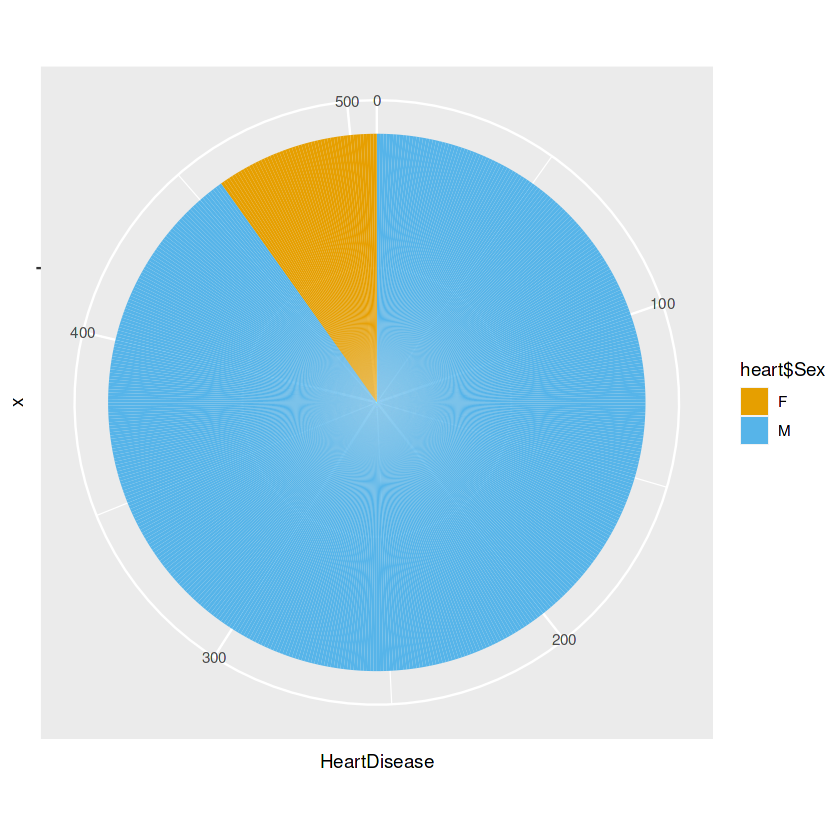

In [8]:
# Create a bar plot to visualize the percentages
heart_disease_percent <- prop.table(table(heart$HeartDisease))
bp <- ggplot(heart, aes(x="", y=HeartDisease, fill=heart$Sex)) +
geom_bar(width = 1, stat = "identity")
pie <- bp + coord_polar("y", start=0)
pie + scale_fill_manual(values=c("#E69F00", "#56B4E9"))
  geom_text(aes(y = HeartDisease/3 + c(0, cumsum(HeartDisease)[-length(HeartDisease)]), label = HeartDisease), size=5)
  
# Create a frequency table for the output class
table(heart$HeartDisease)
# Create a frequency table for the 'Sex' variable
table(heart$Sex, heart$HeartDisease)

This dataset contains more number of Males observation than the female,
so we need to keep this in mind. observations of male with heart disease
is 8 times more than a female. people with heart disease and people with
no heart disease is preety much evenly distributed.

# Categorical Feature Analysis

Target variable visualisation All the observations contains after the
FastingBS output.

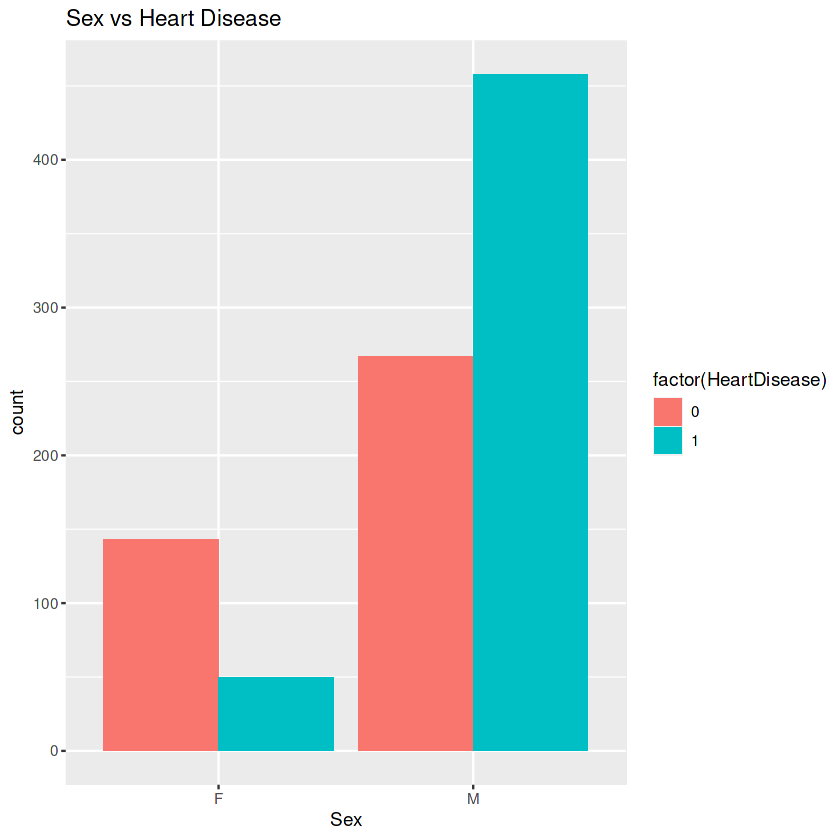

In [9]:
ggplot(heart, aes(x=Sex, fill=factor(HeartDisease))) +
  geom_bar(position = "dodge") +
  ggtitle("Sex vs Heart Disease")

Observations: 1. Men are nearly two times as likely as women to suffer
heart disease.

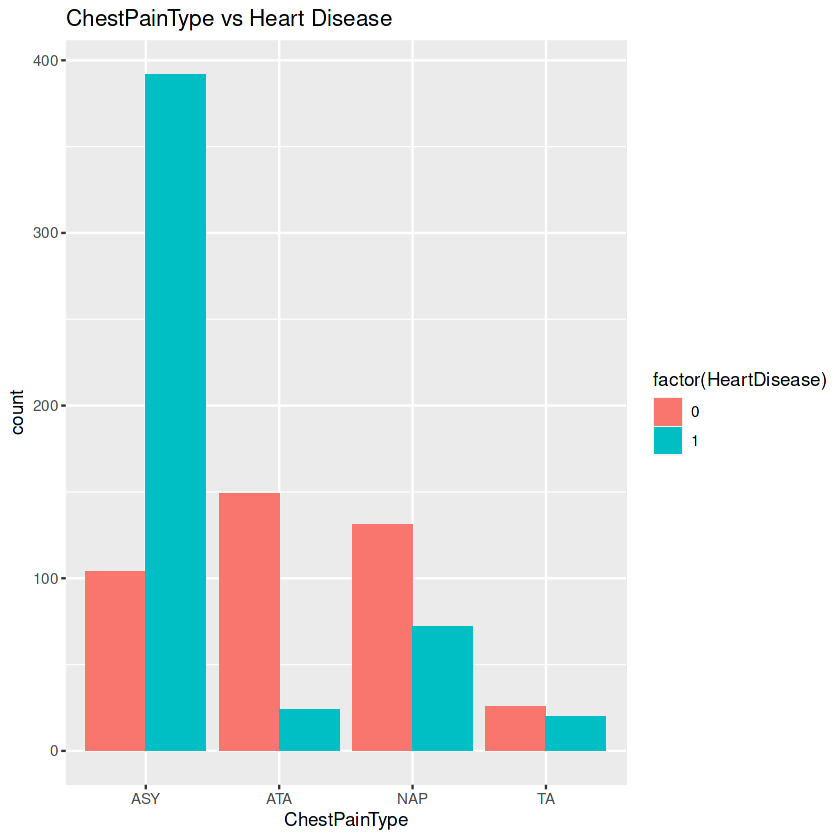

In [10]:
ggplot(heart, aes(x=ChestPainType, fill=factor(HeartDisease))) +
  geom_bar(position = "dodge") +
  ggtitle("ChestPainType vs Heart Disease")

Observations: There are about 500 cases of asymptomatic chest discomfort, which
    means that half of our participants had no prior symptoms before
    having a heart attack.

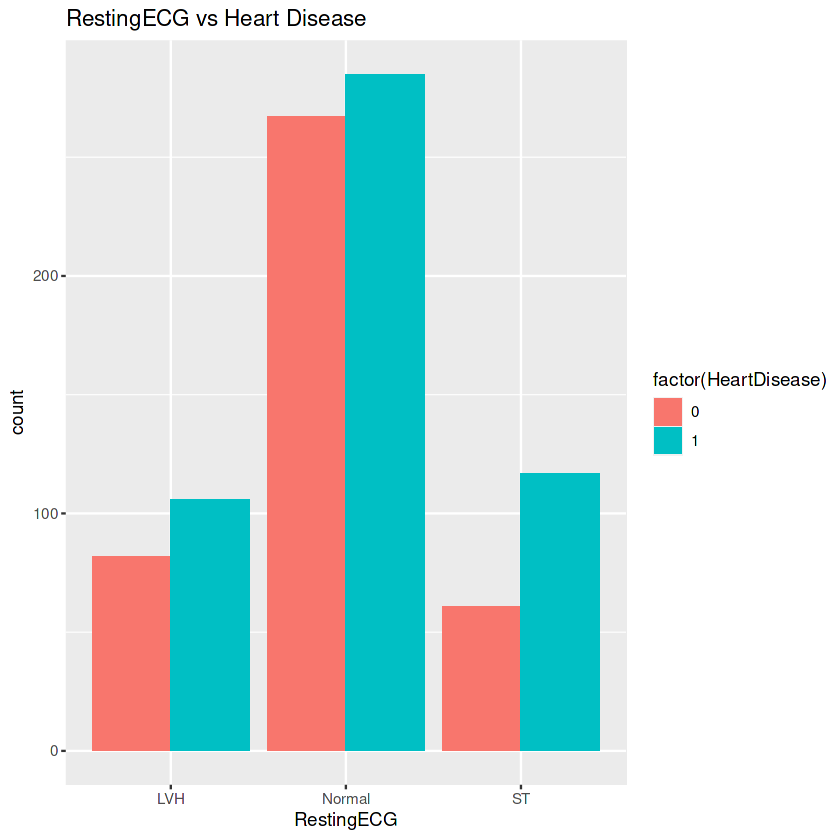

In [11]:
ggplot(heart, aes(x=RestingECG, fill=factor(HeartDisease))) +
  geom_bar(position = "dodge") +
  ggtitle("RestingECG vs Heart Disease")

Observations: Resting electrocardiogram: Person with ST-T wave abnormalities is more likely to have a cardiac condition than the others.

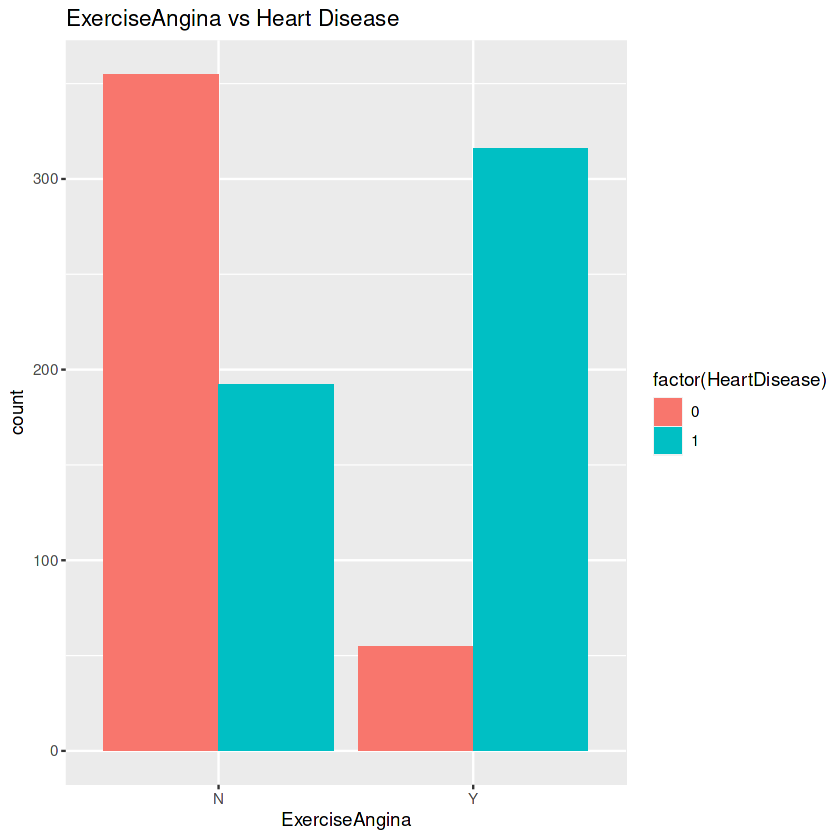

In [12]:
ggplot(heart, aes(x=ExerciseAngina, fill=factor(HeartDisease))) +
  geom_bar(position = "dodge") +
  ggtitle("ExerciseAngina vs Heart Disease")

Observations: ExerciseAngina: Compared to exercise-induced angina with a "No,"exercise-induced angina with a "Yes" is about 2.4 times more likely to be associated with a cardiac condition.

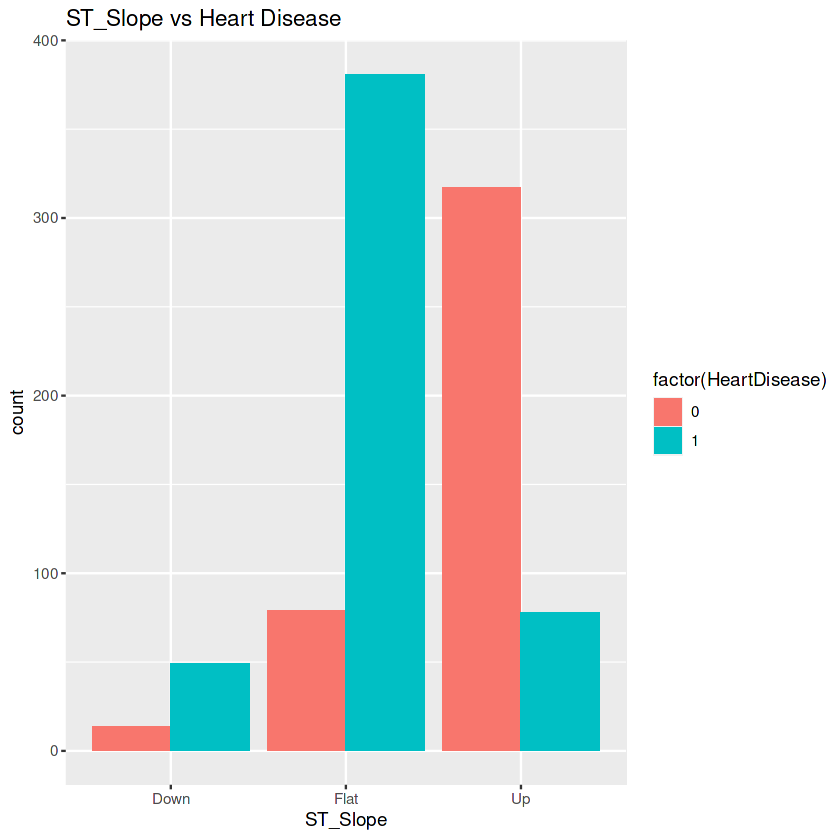

In [13]:
ggplot(heart, aes(x=ST_Slope, fill=factor(HeartDisease))) +
  geom_bar(position = "dodge") +
  ggtitle("ST_Slope vs Heart Disease")

Observations: ST Slope: The peak workout ST segment's slope varies. Compared to the other two segments, ST Slope Up considerably less likely to have heart disease.

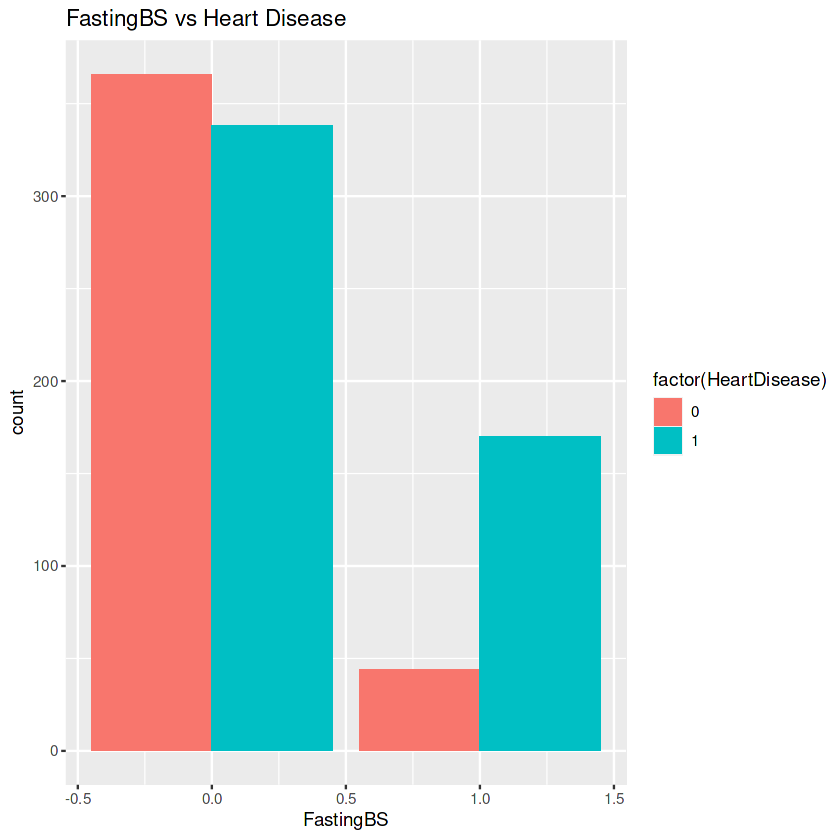

In [14]:
ggplot(heart, aes(x=FastingBS, fill=factor(HeartDisease))) +
  geom_bar(position = "dodge") +
  ggtitle("FastingBS vs Heart Disease")

Observations: FastingBS: Patients with and without fasting blood sugar diagnoses are much more likely to develop heart disease.

# Numerical Features Analysis:

All the ranges are given after all the visualizations Detecting Outliers

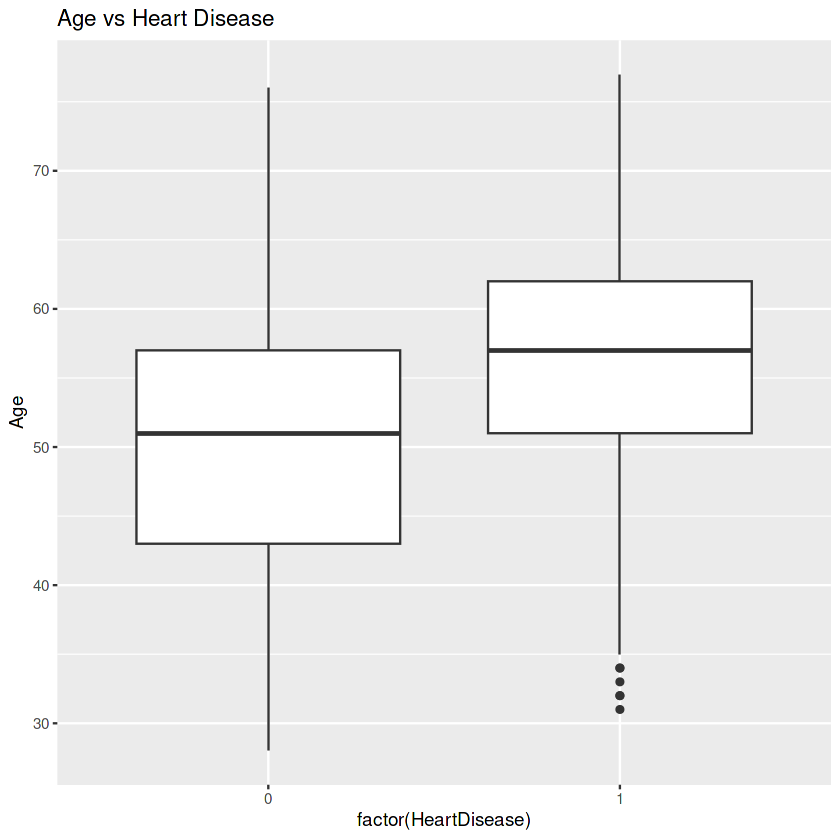

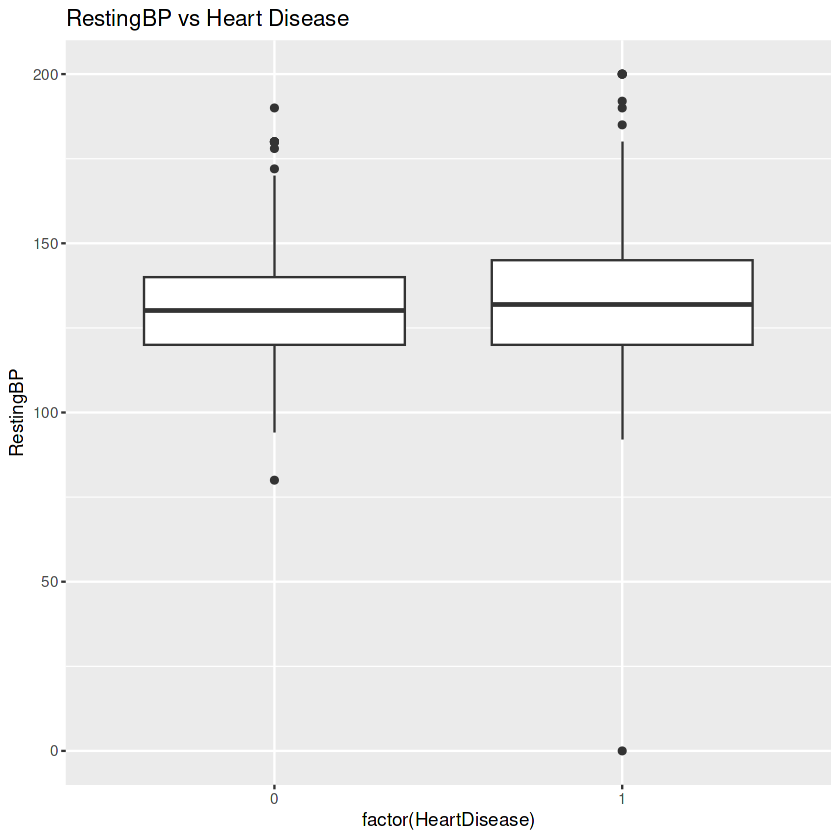

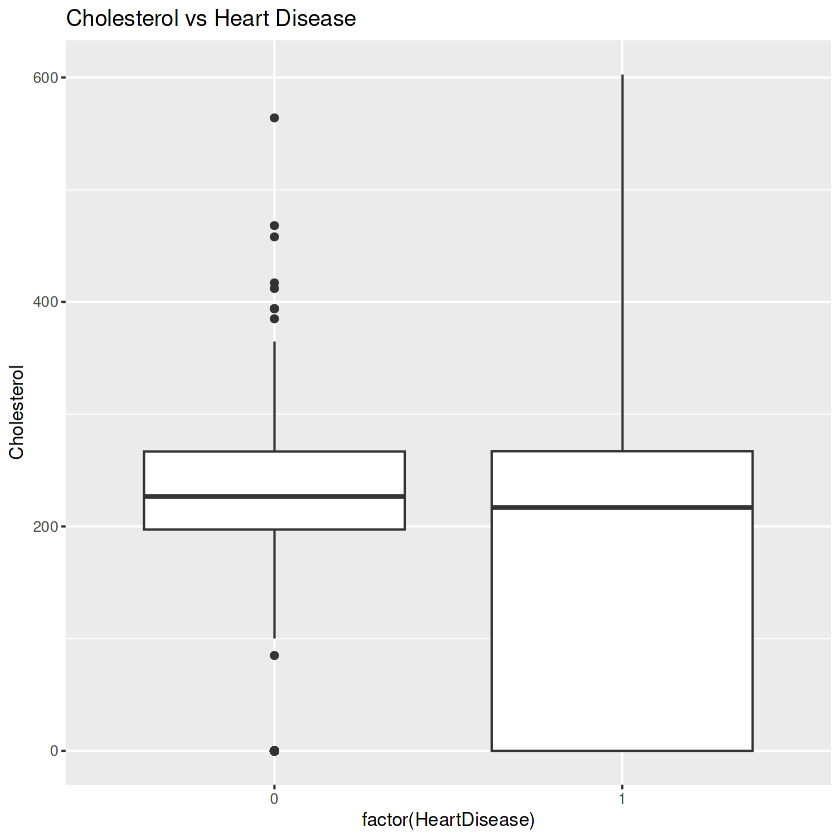

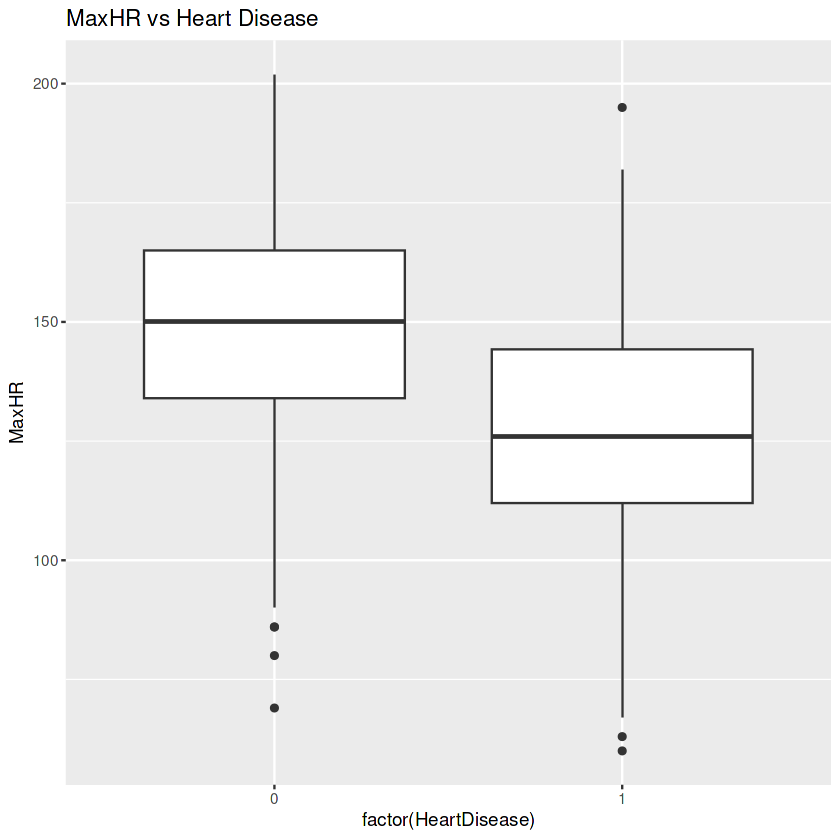

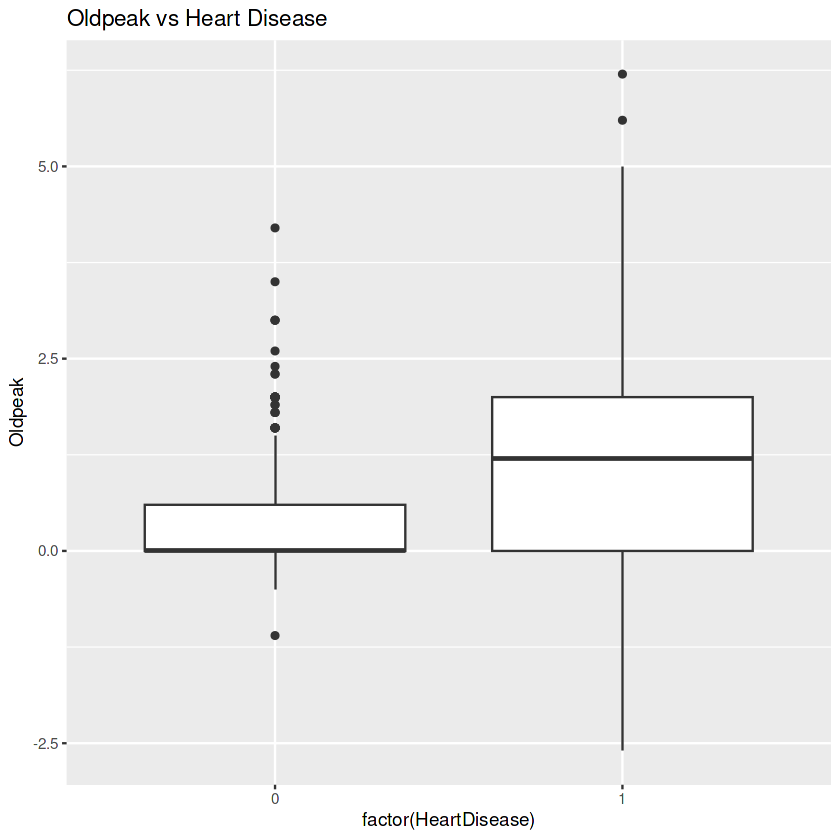

In [15]:
# Box plot for the 'Age' variable
ggplot(heart, aes(x=factor(HeartDisease), y=Age)) +
  geom_boxplot() +
  ggtitle("Age vs Heart Disease")

# Box plot for the 'Age' variable
ggplot(heart, aes(x=factor(HeartDisease), y=RestingBP)) +
  geom_boxplot() +
  ggtitle("RestingBP vs Heart Disease")

# Box plot for the 'Age' variable
ggplot(heart, aes(x=factor(HeartDisease), y=Cholesterol)) +
  geom_boxplot() +
  ggtitle("Cholesterol vs Heart Disease")

# Box plot for the 'Age' variable
ggplot(heart, aes(x=factor(HeartDisease), y=MaxHR)) +
  geom_boxplot() +
  ggtitle("MaxHR vs Heart Disease")

# Box plot for the 'Age' variable
ggplot(heart, aes(x=factor(HeartDisease), y=Oldpeak)) +
  geom_boxplot() +
  ggtitle("Oldpeak vs Heart Disease")

Observations: The range at which patient have high chance of positive
cases of heart disease Age : 50+ RestingBP : 95 - 170 Cholesterol : 0 -
600 MaxHR : 70 - 180 Oldpeak : 0 - 4

Checking Impact of numerical feature on output

Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Removed 1 rows containing non-finite values (`stat_count()`).”


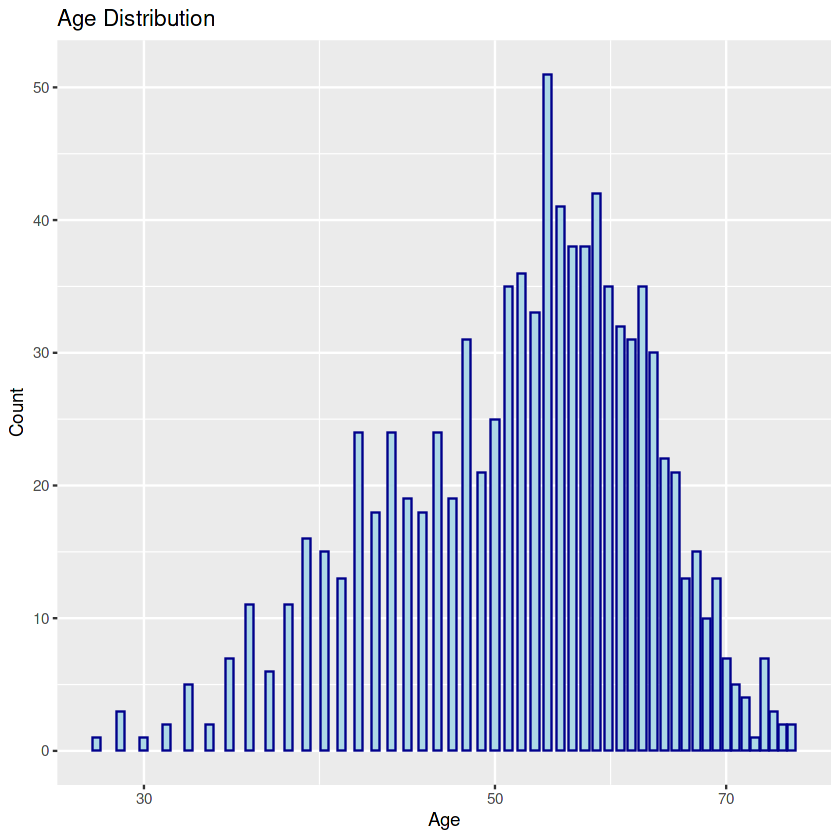

Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Removed 172 rows containing non-finite values (`stat_count()`).”


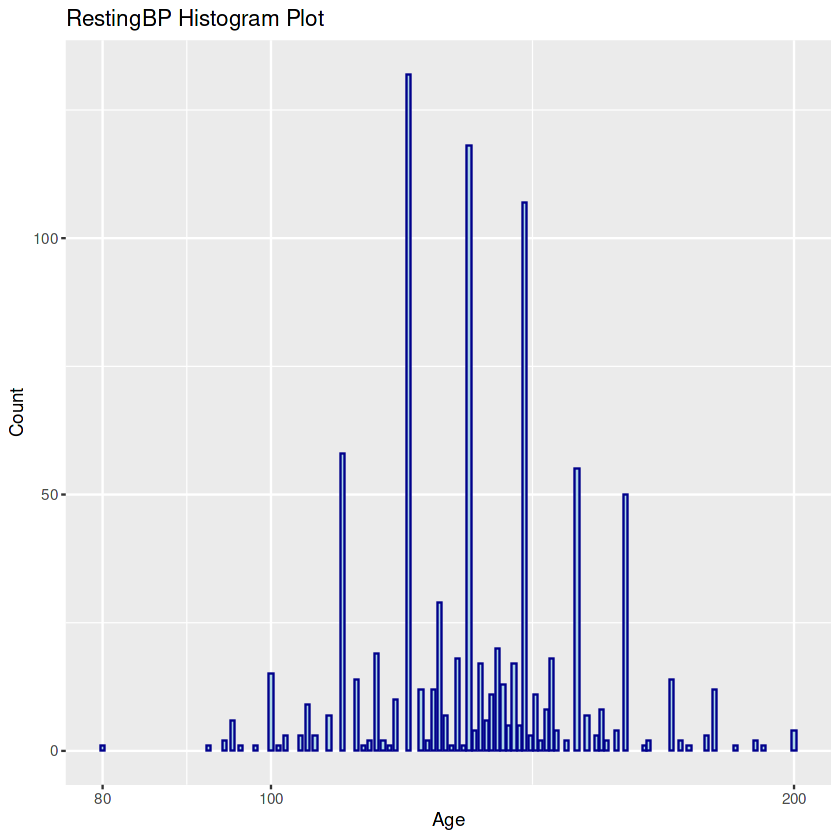

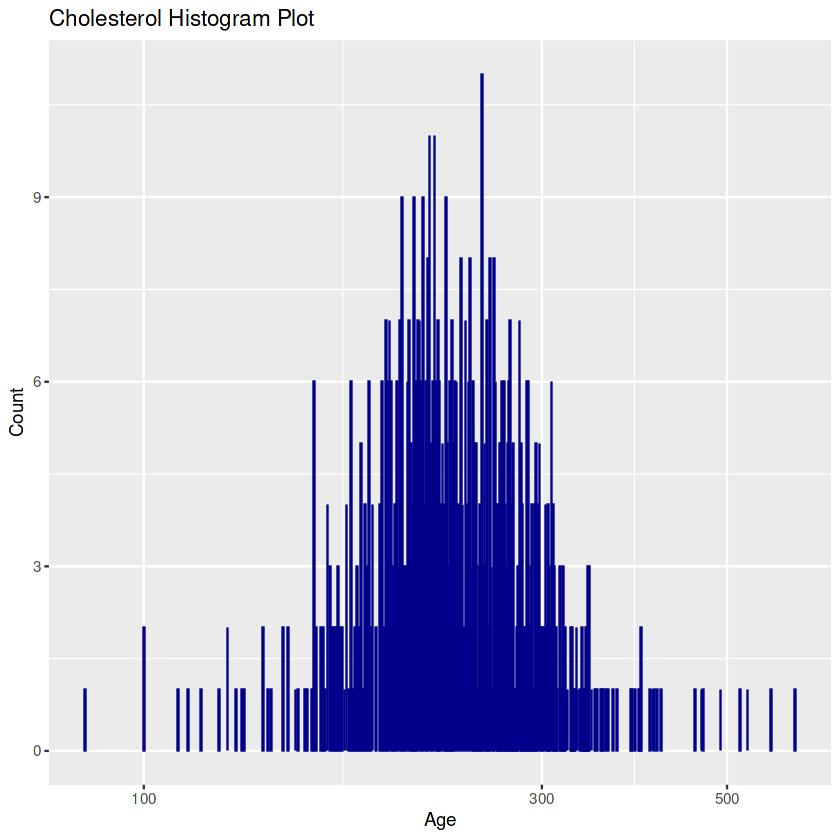

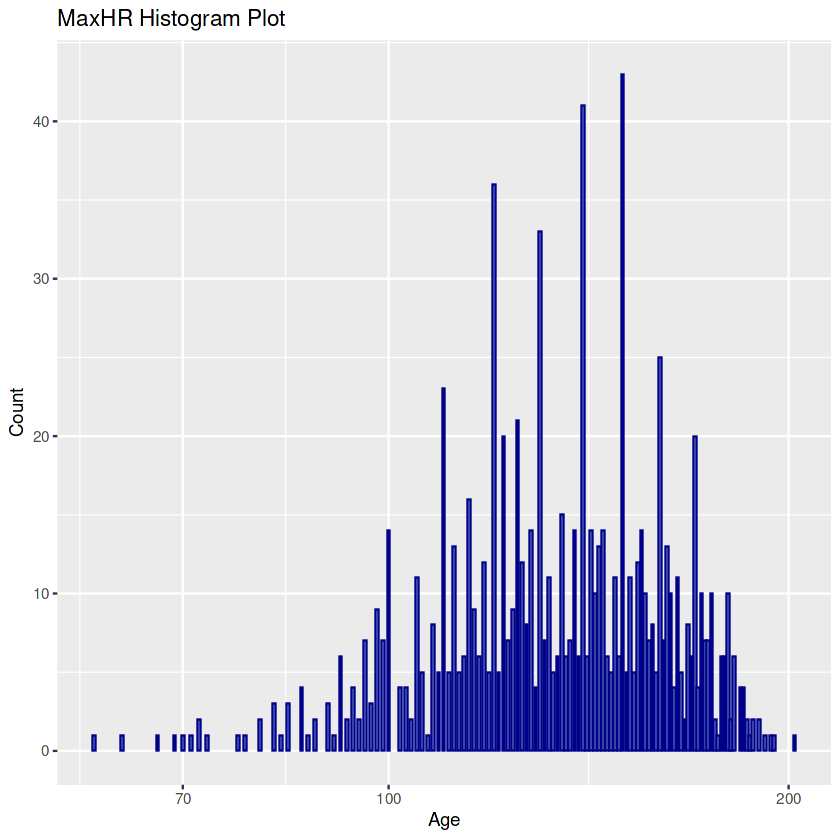

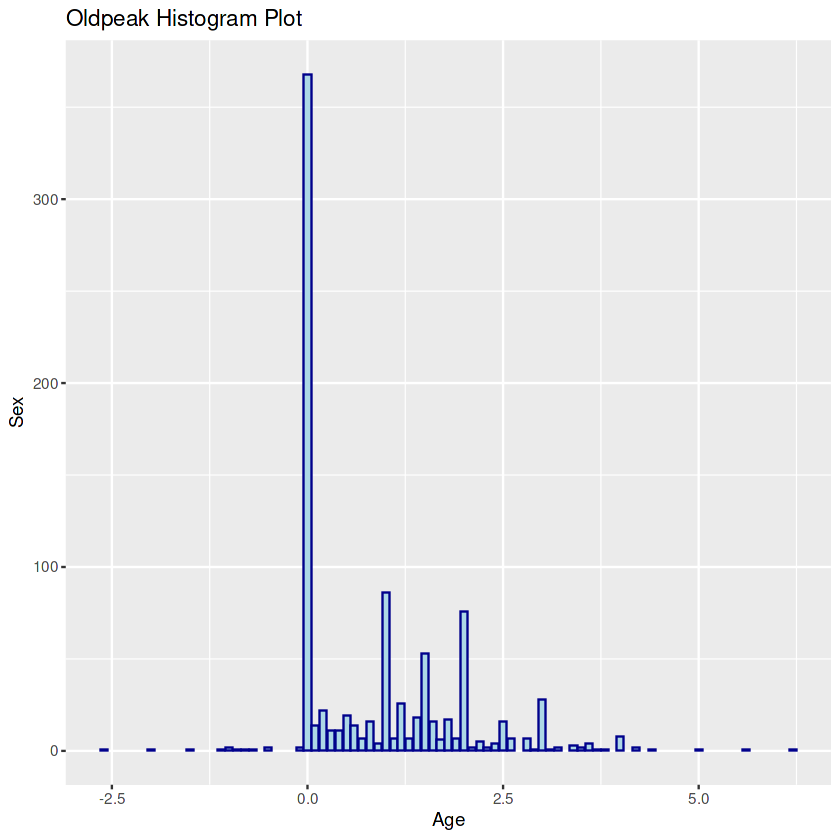

In [16]:
ggplot(data = heart, aes(x= Age)) +
  stat_count(color = "darkblue", fill = "lightblue") +
  labs(title = "Age Distribution", x = "Age", y = "Count") +
  scale_x_log10()

ggplot(data = heart, aes(x= RestingBP)) +
  stat_count(color = "darkblue", fill = "lightblue") +
  labs(title = "RestingBP Histogram Plot", x = "Age", y = "Count")  +
  scale_x_log10()

ggplot(data = heart, aes(x= Cholesterol)) +
  stat_count(color = "darkblue", fill = "lightblue") +
  labs(title = "Cholesterol Histogram Plot", x = "Age", y = "Count")   +
  scale_x_log10()

ggplot(data = heart, aes(x= MaxHR)) +
  stat_count(color = "darkblue", fill = "lightblue") +
  labs(title = "MaxHR Histogram Plot", x = "Age", y = "Count")  +
  scale_x_log10()

ggplot(data = heart, aes(x= Oldpeak)) +
  stat_count(color = "darkblue", fill = "lightblue") +
  labs(title = "Oldpeak Histogram Plot", x = "Age", y = "Sex")

The maximum density is found in people aged 50 to 65, with a mean age of
53.5. Oldpeak's data distribution is rightly skewed appropriately. The
data distribution for cholestrol is bidmodal.

# Bi-variate Analysis

`geom_smooth()` using formula = 'y ~ x'


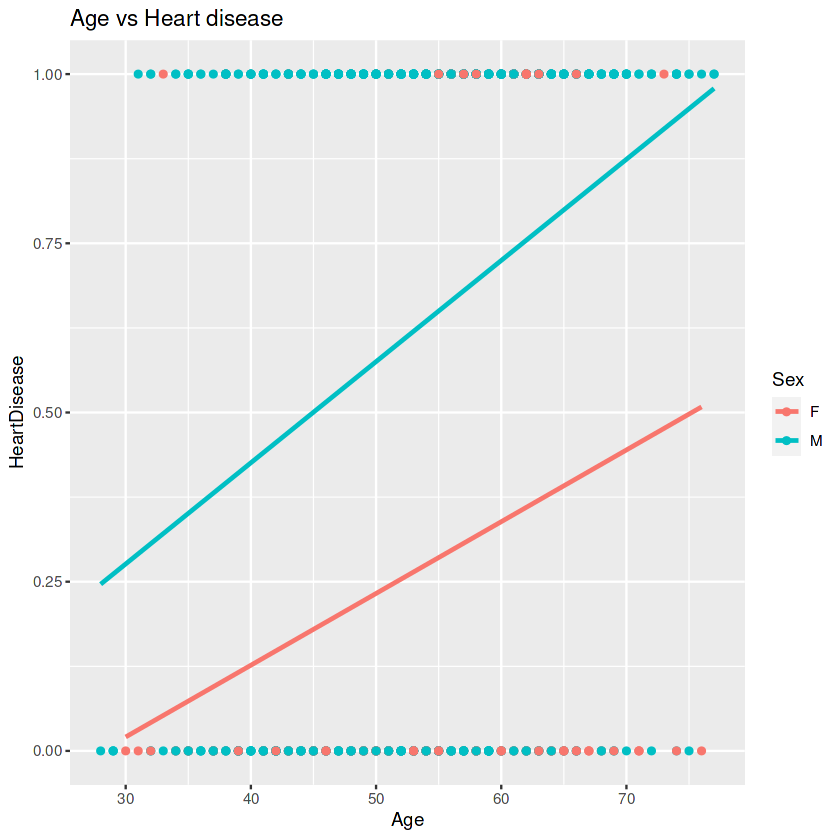

In [17]:
ggplot(heart, aes(x=Age, y=HeartDisease, color=Sex)) +
  geom_point() +
  geom_smooth(method = lm, se = FALSE) +
  labs(title="Age vs Heart disease")

It shows a clear trend that, as patients get older, they have more cases of heart diseases.


`geom_smooth()` using formula = 'y ~ x'


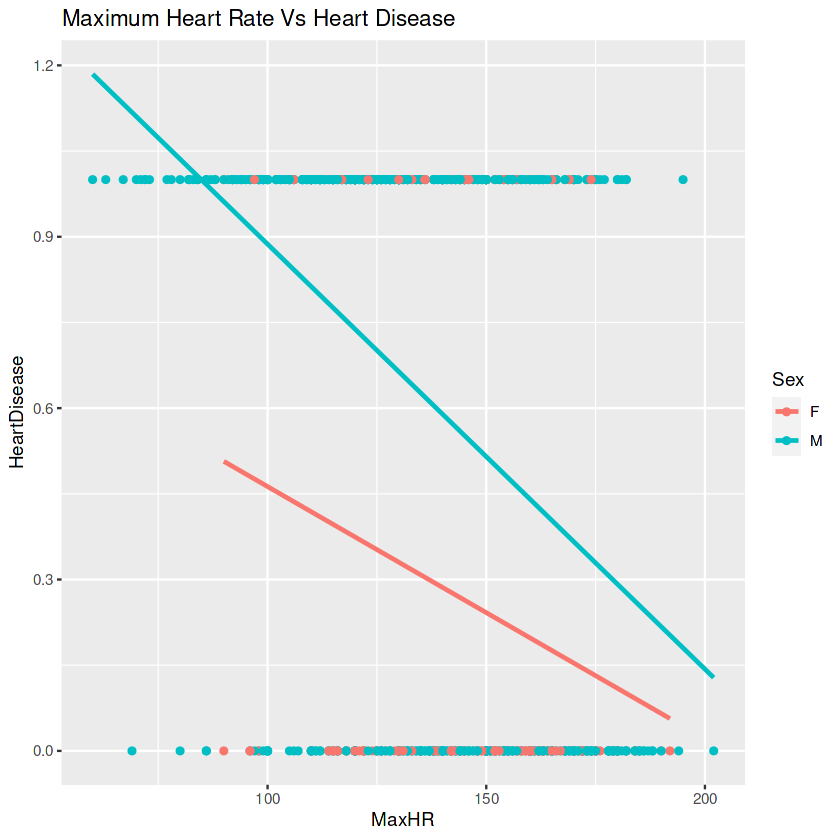

In [18]:
ggplot(heart, aes(x=MaxHR, y=HeartDisease, color=Sex)) +
  geom_point() +
  geom_smooth(method = lm, se = FALSE) +
  labs(title="Maximum Heart Rate Vs Heart Disease")


As expected, those with cardiac disease had lower maximum heart rates.
This might be due to the diseases themselves, which could lead to heart
degeneration.

`geom_smooth()` using formula = 'y ~ x'


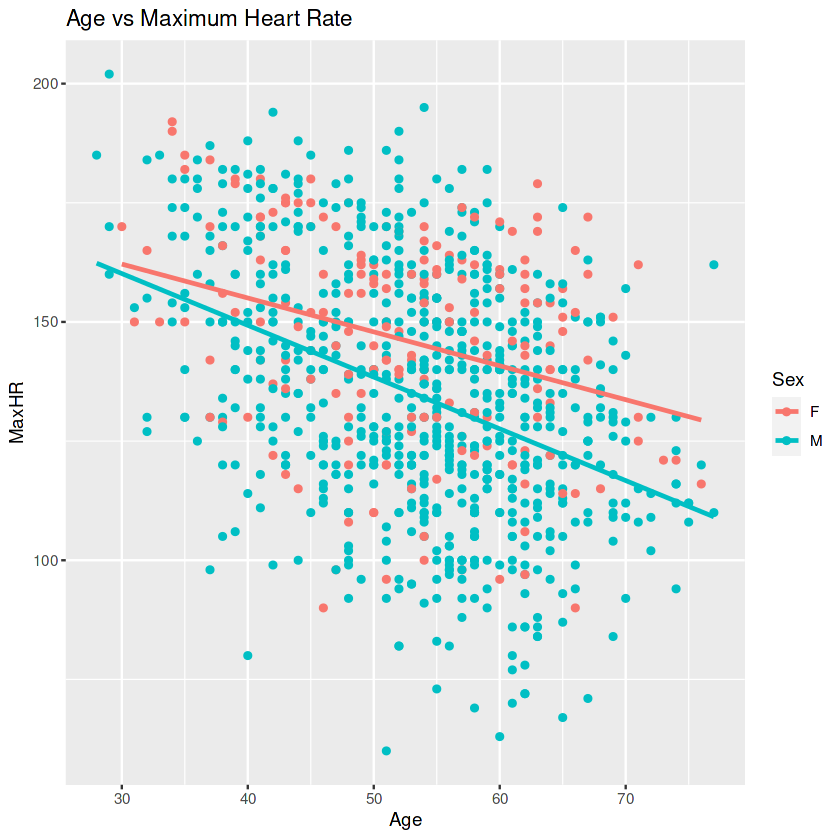

In [19]:
ggplot(heart, aes(x=Age, y=MaxHR, color=Sex)) +
  geom_point() +
  geom_smooth(method = lm, se = FALSE) +
  labs(title = "Age vs Maximum Heart Rate")

This is not directly associated with the heart disease but still good to know: People's maximum heart rates normally decline with age since their hearts aren't as strong as they were in their youth.

`geom_smooth()` using formula = 'y ~ x'


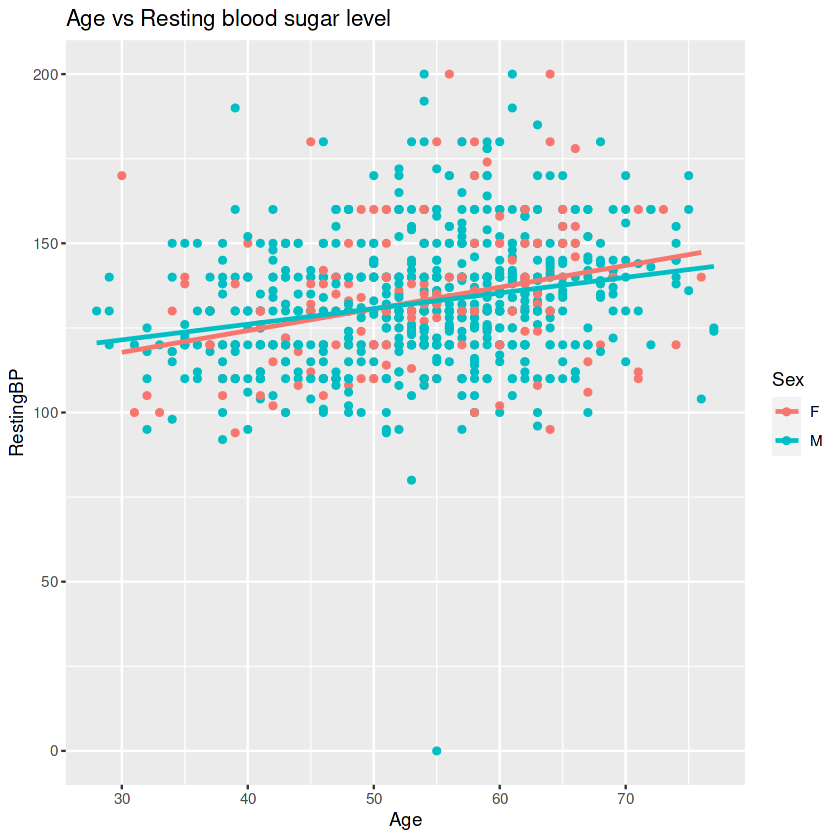

In [20]:
ggplot(heart, aes(x=Age, y=RestingBP, color=Sex)) +
  geom_point() +
  geom_smooth(method = lm, se = FALSE) +
  labs(title = "Age vs Resting blood sugar level")

As patients get older their blood sugar level also increases

`geom_smooth()` using formula = 'y ~ x'


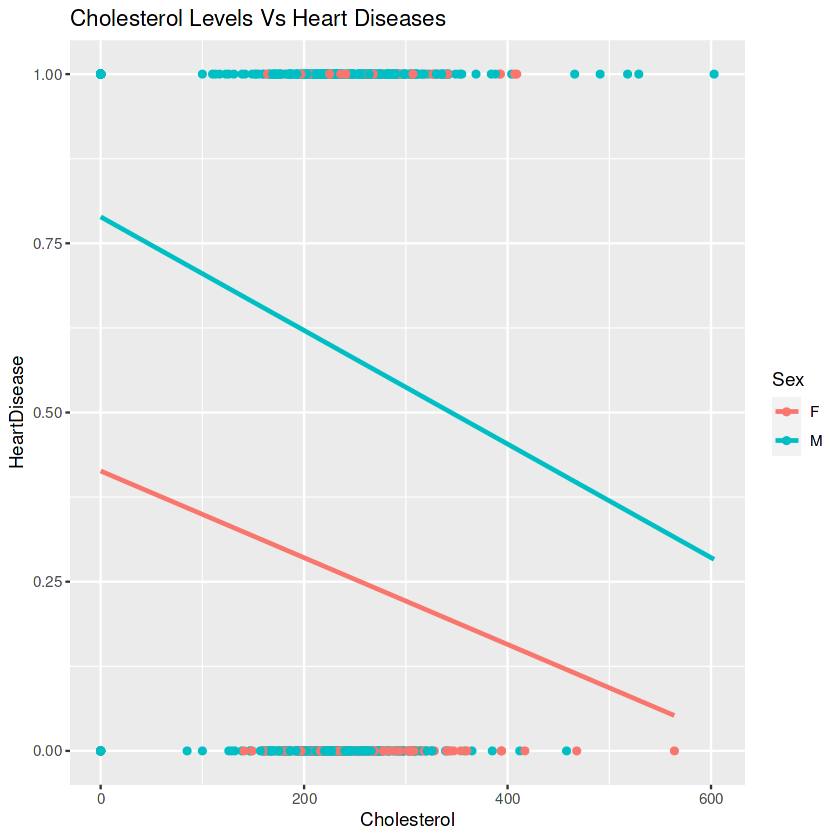

In [21]:
ggplot(heart, aes(x=Cholesterol, y=HeartDisease, 
                                    color=Sex)) +
  geom_point() +
  geom_smooth(method = lm, se = FALSE) +
  labs(title="Cholesterol Levels Vs Heart Diseases")

Patients with heart disease had normal cholesterol levels. This is
uncommon because heart failure is often brought on by high cholesterol
levels.

`geom_smooth()` using formula = 'y ~ x'


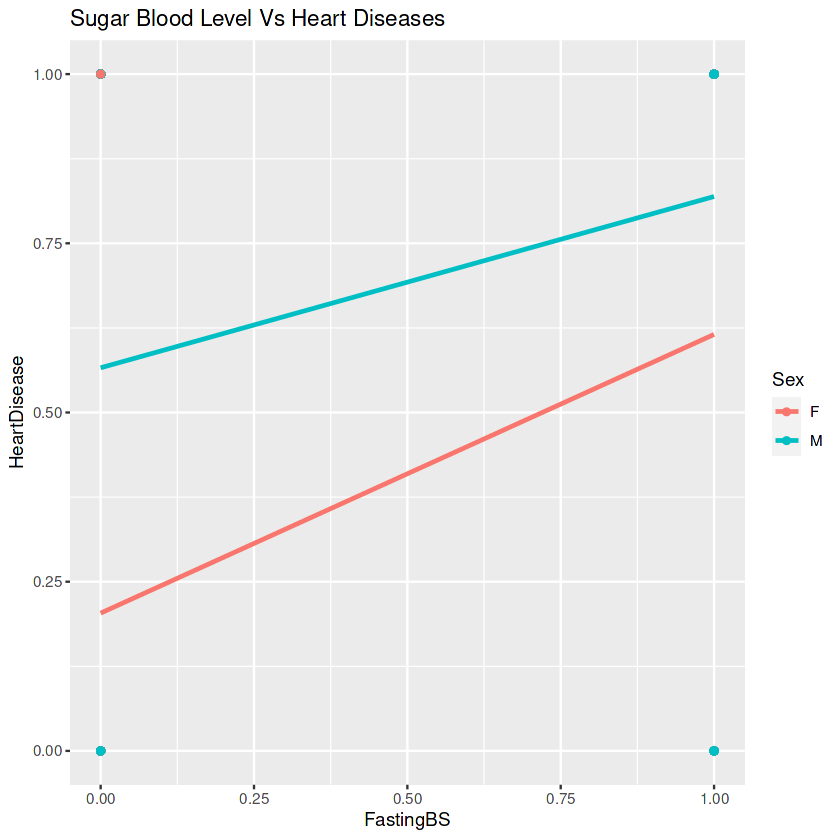

In [22]:
ggplot(heart, aes(x=FastingBS, y=HeartDisease, color=Sex)) +
  geom_point() +
  geom_smooth(method = lm, se = FALSE) +
  labs(title = "Sugar Blood Level Vs Heart Diseases")

As expected, Patients with heart diseases usually have a higher levels
of blood sugar sugar levels.

`geom_smooth()` using formula = 'y ~ x'


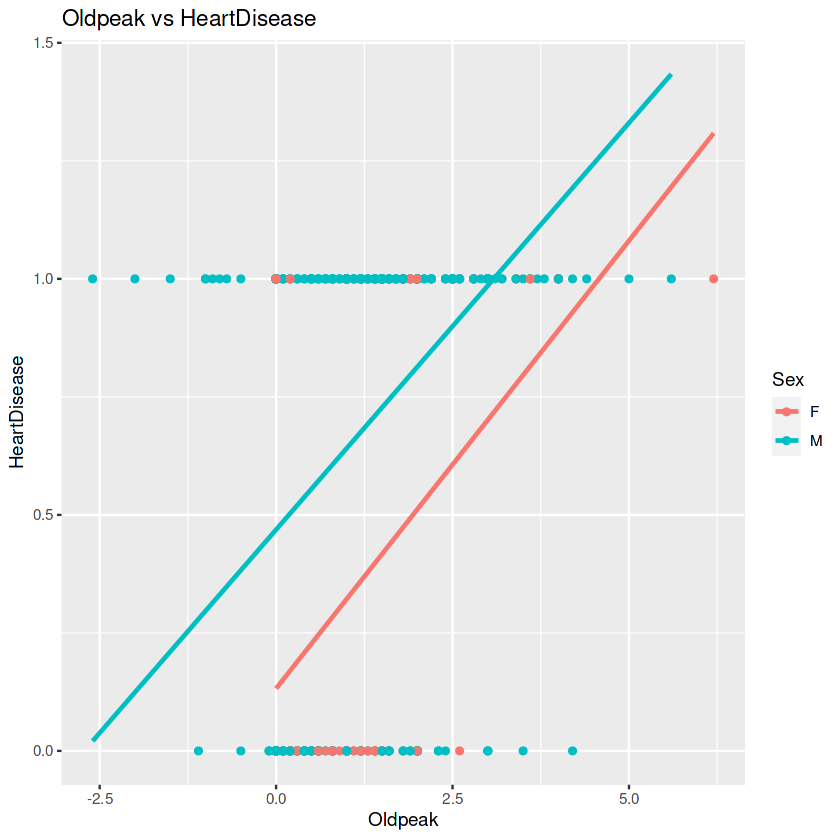

In [23]:
ggplot(heart, aes(x=Oldpeak, y=HeartDisease, color=Sex)) +
  geom_point() +
  geom_smooth(method = lm, se = FALSE) +
  labs(title = "Oldpeak vs HeartDisease")

Trend is very clear that, patients with heart disease have higher
oldpeak (Its a Numeric value measured in depression)

`geom_smooth()` using formula = 'y ~ x'


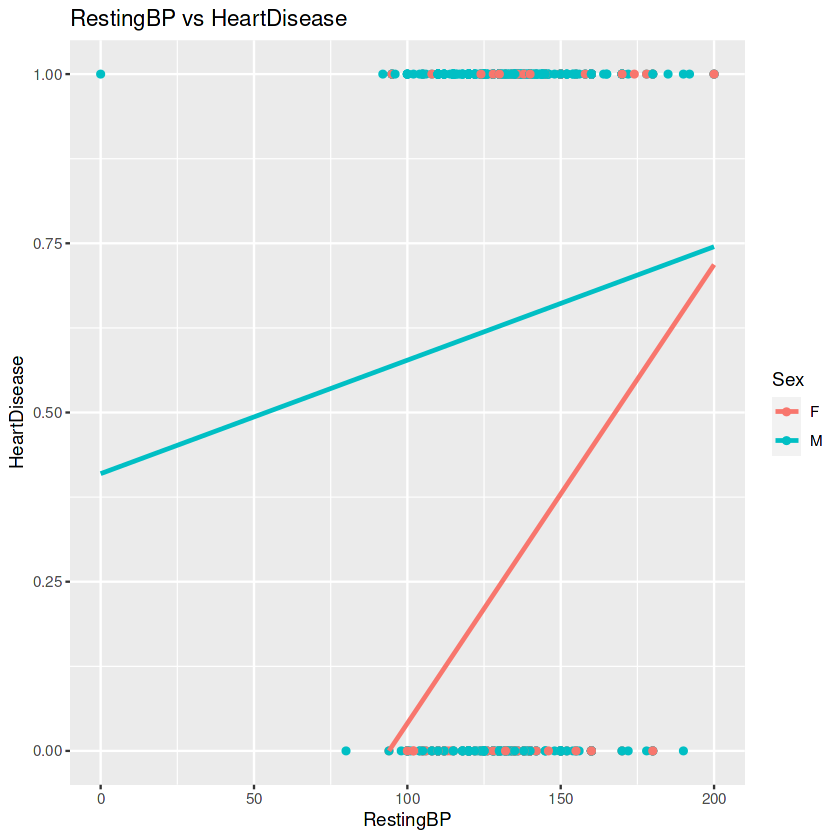

In [24]:
ggplot(heart, aes(x=RestingBP, y=HeartDisease, color=Sex)) +
  geom_point() +
  geom_smooth(method = lm, se = FALSE) +
  labs(title = "RestingBP vs HeartDisease")

Patients with higher blood pressure level has higher cases of having
heart disease.

Multivariate Analysis

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


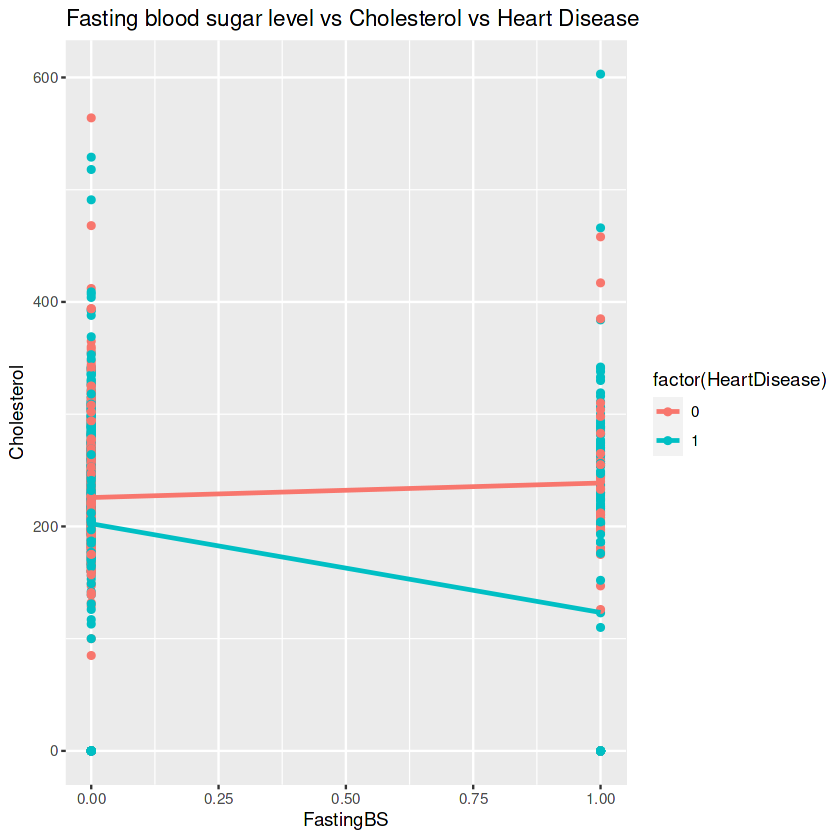

`geom_smooth()` using formula = 'y ~ x'


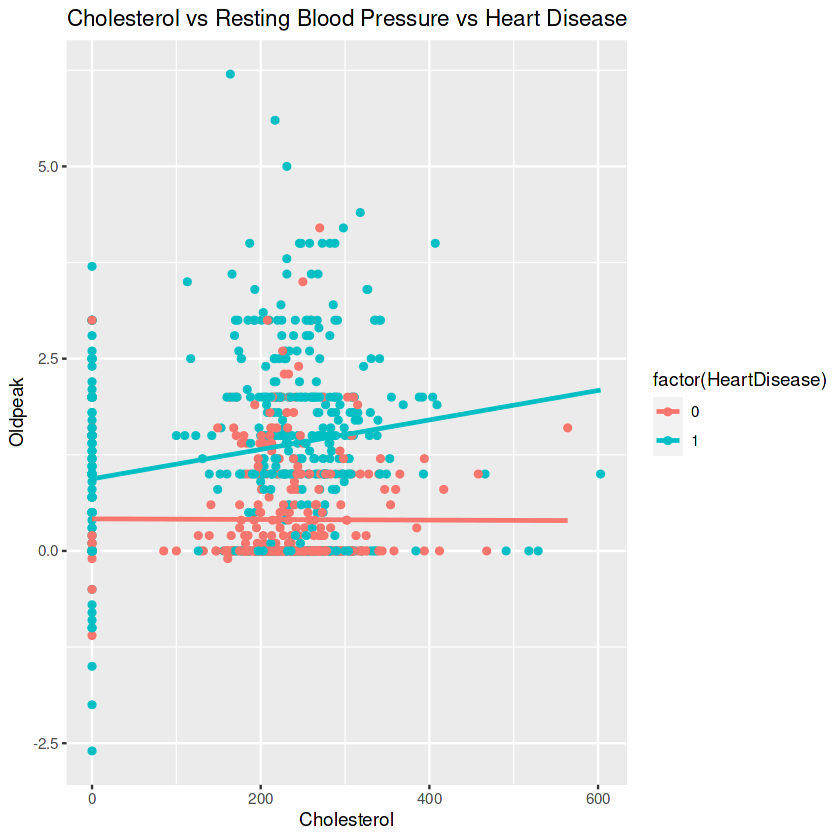

`geom_smooth()` using formula = 'y ~ x'


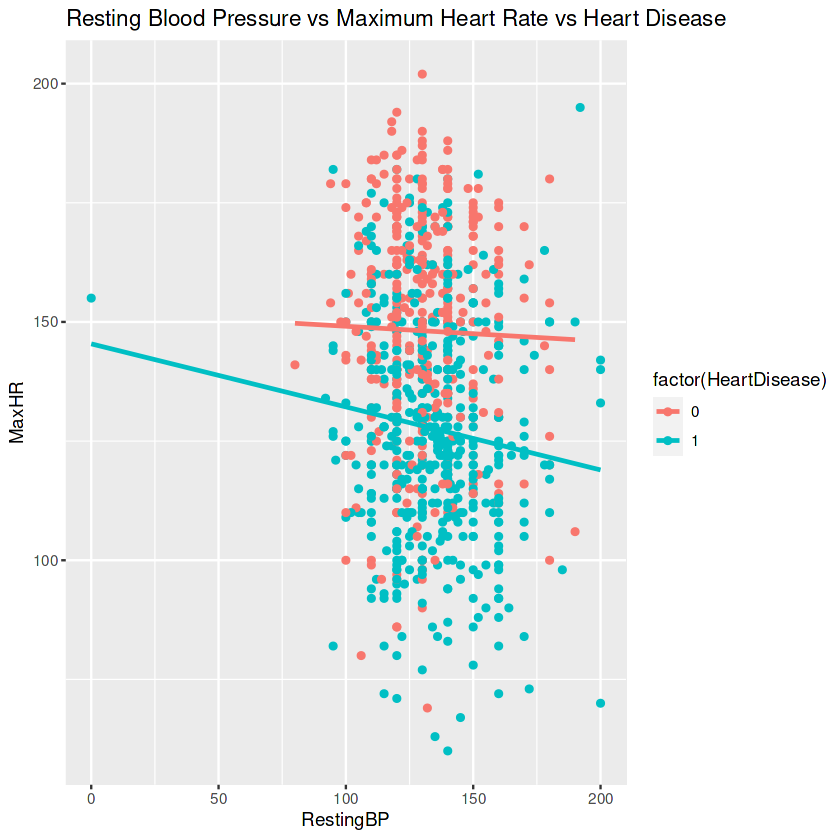

`geom_smooth()` using formula = 'y ~ x'


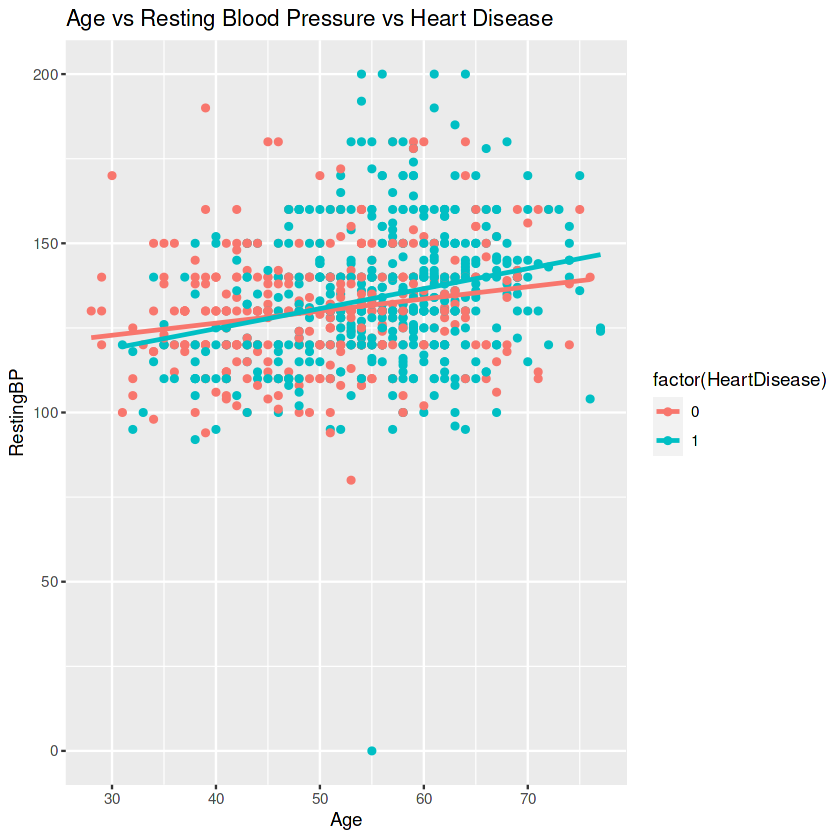

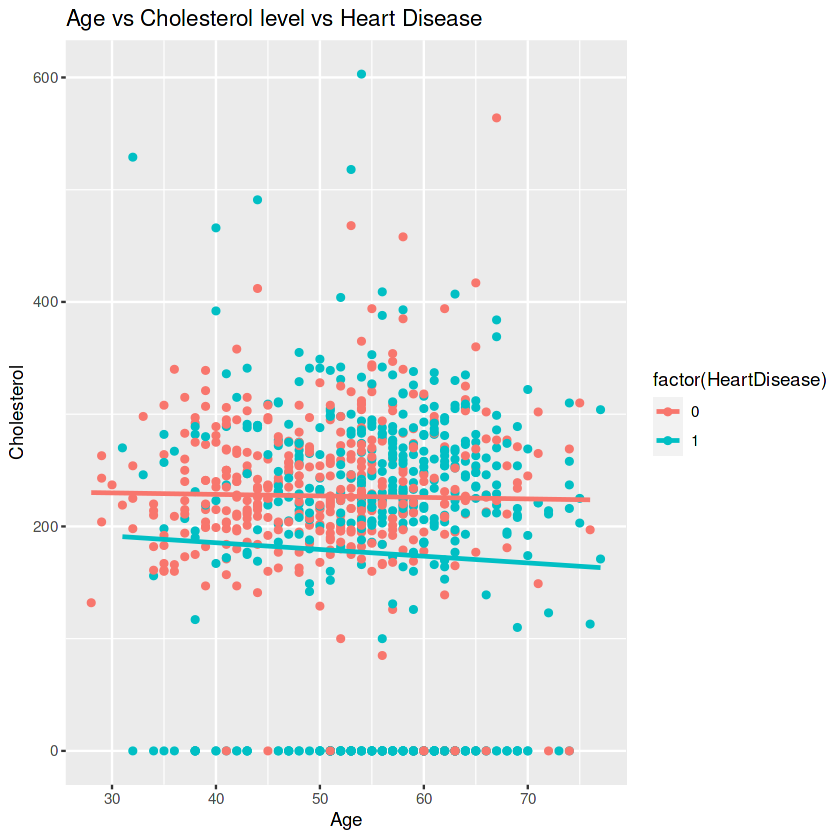

In [25]:
# Scatter plot for the 'RestingBP' and 'Cholesterol' variables
ggplot(heart, aes(x=FastingBS, y=Cholesterol, color=factor(HeartDisease))) +
  geom_point() +
  geom_smooth(method = lm, se = FALSE) +
  ggtitle("Fasting blood sugar level vs Cholesterol vs Heart Disease")

ggplot(heart, aes(x=Cholesterol, y=Oldpeak, color=factor(HeartDisease))) +
  geom_point() +
  geom_smooth(method = lm, se = FALSE) +
  ggtitle("Cholesterol vs Resting Blood Pressure vs Heart Disease")

ggplot(heart, aes(x=RestingBP, y=MaxHR, color=factor(HeartDisease))) +
  geom_point() +
  geom_smooth(method = lm, se = FALSE) +
  ggtitle("Resting Blood Pressure vs Maximum Heart Rate vs Heart Disease")

ggplot(heart, aes(x=Age, y=RestingBP, color=factor(HeartDisease))) +
  geom_point() +
  geom_smooth(method = lm, se = FALSE) +
  ggtitle("Age vs Resting Blood Pressure vs Heart Disease")

ggplot(heart, aes(x=Age, y=Cholesterol, color=factor(HeartDisease))) +
  geom_point() +
  geom_smooth(method = lm, se = FALSE) +
  ggtitle("Age vs Cholesterol level vs Heart Disease")

1.  Patients are more likely to develop heart disease if their maximum
    heart rate is higher and their resting blood pressure is lower.
2.  As we already know, as people age, their blood sugar levels rise as
    well, which also tends to raise their risk of developing heart
    disease.

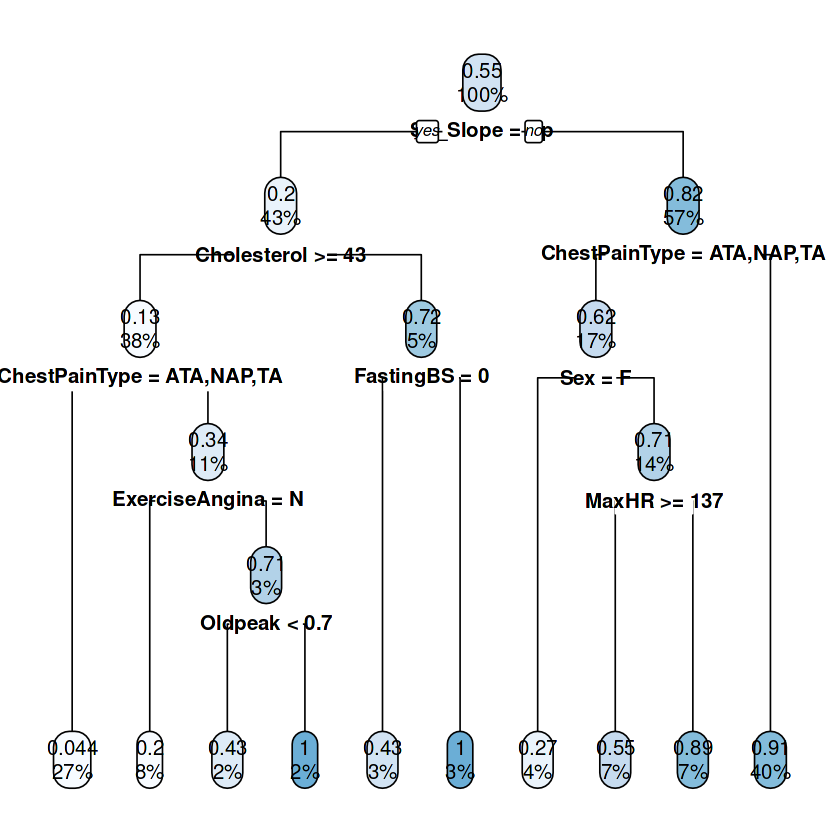

In [26]:
# # Fit a decision tree model using all of the variables   
library(rpart)
library(rpart.plot)
model <- rpart(HeartDisease ~ ., data = heart)
rpart.plot(model)

Statistical testing

The chi-square test to determine if there is a significant association
between all the numerical feature and HeartDisease

In [27]:
# Chi-square test
chisq.test(table(heart$Cholesterol, heart$HeartDisease))
chisq.test(table(heart$MaxHR, heart$HeartDisease))
chisq.test(table(heart$FastingBS, heart$HeartDisease))
chisq.test(table(heart$Age, heart$HeartDisease))

Warning message in chisq.test(table(heart$Cholesterol, heart$HeartDisease)):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  table(heart$Cholesterol, heart$HeartDisease)
X-squared = 332.19, df = 221, p-value = 1.86e-06


Warning message in chisq.test(table(heart$MaxHR, heart$HeartDisease)):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  table(heart$MaxHR, heart$HeartDisease)
X-squared = 241.32, df = 118, p-value = 1.722e-10



	Pearson's Chi-squared test with Yates' continuity correction

data:  table(heart$FastingBS, heart$HeartDisease)
X-squared = 64.321, df = 1, p-value = 1.057e-15


Warning message in chisq.test(table(heart$Age, heart$HeartDisease)):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  table(heart$Age, heart$HeartDisease)
X-squared = 125.37, df = 49, p-value = 1.282e-08


Observations: As p-value less than 0.05 would indicate a significant
association between the heart disease and all thease features like
Cholestrol level, Maximum heart rate, Age and finally blood sugar level.

Conclusion:

Out of all heart disease patients, a startling 90% of them are men,
according to the data. 77% of ASY types result in cardiac problems,
which is the majority. Exercise-induced angina with a 'Yes' is about 2.4
times more likely to suffer a heart disease. A fasting blood sugar level
below 120 mg/dl indicates a greater risk of developing heart disease.
From the perspective of numerical characteristics, patients in this
range are more likely to suffer heart illness. Age: 50+, Resting Blood
Pressure: 95-170, Cholesterol: 0--600, Maximum Heart Rate: 70--180,
Oldpeak: 0--4. Age, Maximum Heart Rate, Cholesterol, and Fasting Blood
Sugar Level are the most significant predictors of heart disease,
according to our analysis of various features